In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Extracting files into dataframes

In [2]:
def convert_pd(file: str) -> pd.DataFrame:
    """
    Convert a text file to a pandas DataFrame.

    Args:
        file (str): Path to the text file.

    Returns:
        pd.DataFrame: DataFrame containing the data from the text file.
    """
    df = pd.read_csv(file, header=None, delim_whitespace=True)
    return df

def get_y(file: str) -> np.ndarray:
    """
    Extract a list of values from a text file.

    Args:
        file (str): Path to the text file.

    Returns:
        np.ndarray: Array containing the values from the file.
    """
    with open(file, 'r') as f:
        values = f.read().splitlines()
    return np.array(values, dtype=int) - 1

y_train = get_y('../train/y_train.txt')
y_test = get_y('../test/y_test.txt')

cols = ["body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z"]
labels = ['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing', 'Laying']

In [3]:
def batch_convert(train: str):
    l = []
    for name in cols:
        p = convert_pd(f"../{train}/Inertial Signals/{name}_{train}.txt")
        l += [p]
    return l

train = batch_convert("train")
test = batch_convert("test")

C:\Users\tungq\AppData\Local\Temp\ipykernel_112612\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_112612\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_112612\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_112612\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version.

In [4]:
def get_by_item(data: list, num: int):
    rows = []
    for i in range(len(data)):
        rows.append(data[i].iloc[num, ].to_numpy())
    df = pd.DataFrame(rows)
    df = df.transpose()
    df.columns = cols
    return df

In [5]:
from tqdm import tqdm

def get_whole_dataset(data: list, y: np.ndarray, minmax: bool = False) -> pd.DataFrame:
    """
    Get all data samples, concattenate them into one single DataFrame.
    """
    cols = ["body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z", "sample_id", "label"]
    id = 0
    total_df = []
    print(f"Extracting with MinMax: {minmax}")
    for i in tqdm(range(len(data[0])), desc="Processing samples"):
        df = {}
        if minmax:
            df = {
                "body_acc_x": (data[0].iloc[i, ].to_numpy() - data[0].iloc[i, ].min()) / (data[0].iloc[i, ].max() - data[0].iloc[i, ].min()),
                "body_acc_y": (data[1].iloc[i, ].to_numpy() - data[1].iloc[i, ].min()) / (data[1].iloc[i, ].max() - data[1].iloc[i, ].min()),
                "body_acc_z": (data[2].iloc[i, ].to_numpy() - data[2].iloc[i, ].min()) / (data[2].iloc[i, ].max() - data[2].iloc[i, ].min()),
                "body_gyro_x": (data[3].iloc[i, ].to_numpy() - data[3].iloc[i, ].min()) / (data[3].iloc[i, ].max() - data[3].iloc[i, ].min()),
                "body_gyro_y": (data[4].iloc[i, ].to_numpy() - data[4].iloc[i, ].min()) / (data[4].iloc[i, ].max() - data[4].iloc[i, ].min()),
                "body_gyro_z": (data[5].iloc[i, ].to_numpy() - data[5].iloc[i, ].min()) / (data[5].iloc[i, ].max() - data[5].iloc[i, ].min()),
                "total_acc_x": (data[6].iloc[i, ].to_numpy() - data[6].iloc[i, ].min()) / (data[6].iloc[i, ].max() - data[6].iloc[i, ].min()),
                "total_acc_y": (data[7].iloc[i, ].to_numpy() - data[7].iloc[i, ].min()) / (data[7].iloc[i, ].max() - data[7].iloc[i, ].min()),
                "total_acc_z": (data[8].iloc[i, ].to_numpy() - data[8].iloc[i, ].min()) / (data[8].iloc[i, ].max() - data[8].iloc[i, ].min()),
                "sample_id": id,
                "label": y[i]
            }
        else:
            df = {
                "body_acc_x": data[0].iloc[i, ].to_numpy(),
                "body_acc_y": data[1].iloc[i, ].to_numpy(),
                "body_acc_z": data[2].iloc[i, ].to_numpy(),
                "body_gyro_x": data[3].iloc[i, ].to_numpy(),
                "body_gyro_y": data[4].iloc[i, ].to_numpy(),
                "body_gyro_z": data[5].iloc[i, ].to_numpy(),
                "total_acc_x": data[6].iloc[i, ].to_numpy(),
                "total_acc_y": data[7].iloc[i, ].to_numpy(),
                "total_acc_z": data[8].iloc[i, ].to_numpy(),
                "sample_id": id,
                "label": y[i]
            }
        total_df.append(df)
        id += 1
    df = pd.DataFrame(total_df)
    df.columns = cols
    return df

In [6]:
total_df = get_whole_dataset(train, y_train)
total_df.head()

Extracting with MinMax: False


Processing samples: 100%|██████████| 7352/7352 [00:03<00:00, 2438.88it/s]


,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,sample_id,label
0,"[0.0001808515, 0.01013856, 0.009275574, 0.0050...","[0.01076681, 0.00657948, 0.008928878, 0.007488...","[0.05556068, 0.05512483, 0.04840473, 0.0497749...","[0.03019122, 0.04371071, 0.0356878, 0.0404021,...","[0.06601362, 0.04269897, 0.07485018, 0.0573197...","[0.02285864, 0.01031572, 0.01324969, 0.0177512...","[1.012817, 1.022833, 1.022028, 1.017877, 1.023...","[-0.1232167, -0.1268756, -0.1240037, -0.124927...","[0.1029341, 0.1056872, 0.1021025, 0.1065527, 0...",0,4
1,"[0.001093752, 0.004550077, 0.002879173, 0.0022...","[-0.004687588, -0.007487894, -0.008429991, -0....","[-0.02685954, -0.02509841, -0.02597534, -0.026...","[0.01711106, 0.02417851, 0.03022889, 0.0320285...","[0.006122797, 0.009710357, 0.01032192, 0.01341...","[0.01226815, 0.01614958, 0.01589471, 0.0126711...","[1.018851, 1.02238, 1.020781, 1.020218, 1.0213...","[-0.123976, -0.1268078, -0.1277862, -0.1266547...","[0.09792958, 0.09935086, 0.09811381, 0.0975171...",1,4
2,"[0.003531266, 0.002285063, -0.0004197538, -0.0...","[0.004455942, 0.003045876, 0.001776179, 0.0009...","[-0.005914581, -0.004138911, -0.0005428851, 0....","[0.02618877, 0.02165149, 0.01455062, 0.0148146...","[-0.000238341, -0.0004275982, 0.000761135, -0....","[0.002158897, -0.0002724752, 0.002630986, 0.00...","[1.023127, 1.021882, 1.019178, 1.015861, 1.012...","[-0.1200157, -0.1214994, -0.1228407, -0.123717...","[0.09111667, 0.0926756, 0.09606378, 0.09989713...",2,4
3,"[-0.001772352, -0.001311448, 0.0003876795, 0.0...","[-0.01018541, -0.01125254, -0.0121963, -0.0111...","[0.001053255, 0.001227295, -0.006004362, -0.00...","[-0.03751574, -0.033097, -0.03036013, -0.02500...","[-0.01288632, -0.01691822, -0.01618518, -0.012...","[-0.0008727416, -0.00548197, -0.00467823, -0.0...","[1.017682, 1.018149, 1.019854, 1.01988, 1.0191...","[-0.1334039, -0.1343639, -0.1352028, -0.134048...","[0.0951518, 0.09541539, 0.08827355, 0.08632477...",3,4
4,"[8.747685e-05, -0.0002719175, 0.001022103, 0.0...","[-0.003856929, -0.002837935, -0.003086418, -0....","[-0.01333336, -0.01494756, -0.01567863, -0.009...","[-0.01942932, -0.01909099, -0.01481631, -0.013...","[-0.008612378, -0.008146719, -0.00537662, -0.0...","[-0.00157401, 0.0002007077, -0.0009700938, -0....","[1.019952, 1.019616, 1.020933, 1.023061, 1.022...","[-0.1287306, -0.1278461, -0.12823, -0.1298541,...","[0.0808414, 0.07912684, 0.07829138, 0.08406305...",4,4


# 2. Additional preprocessing

## Apply min-max by each features
This data was rescaled with Min-Max scale for the whole sample, but we'll try rescaling on each features

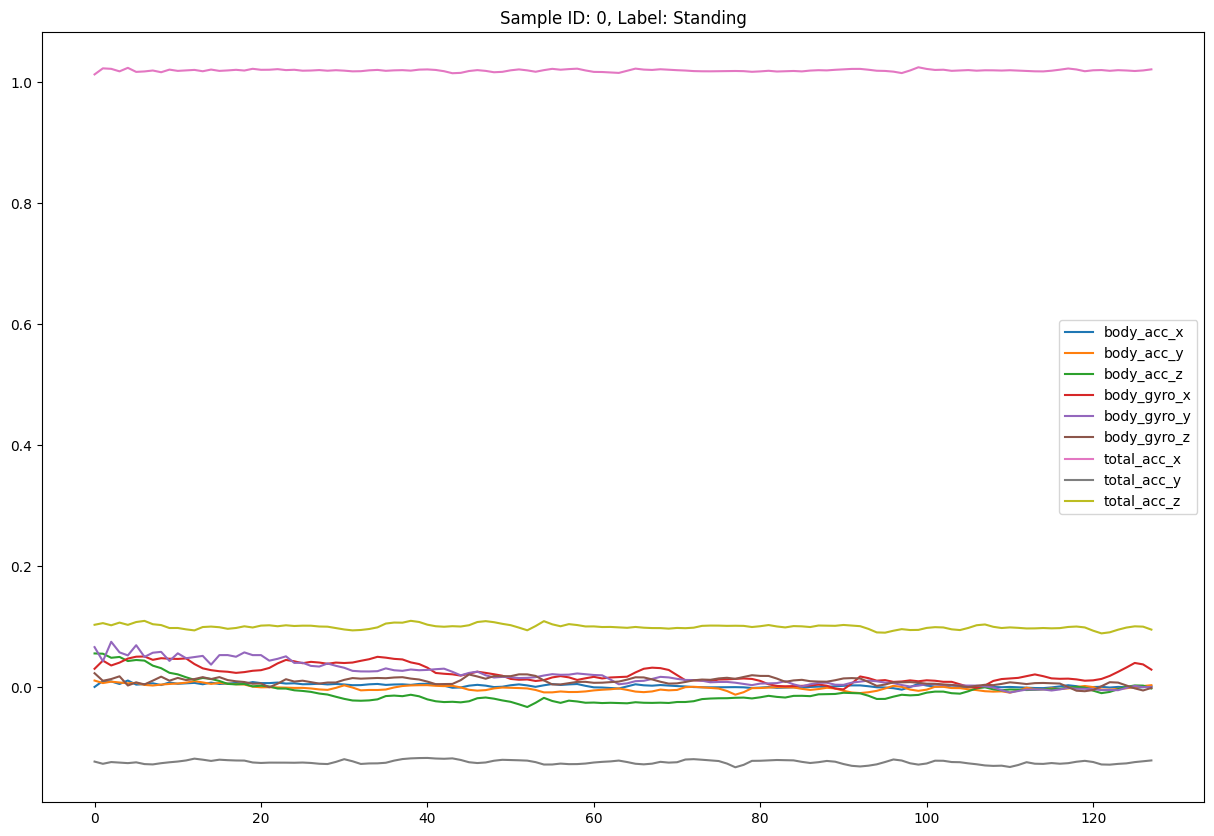

In [7]:
def row_to_df(row):
    """
    A row contains many arrays in cells, convert it to a DataFrame.
    """
    label = row['label']
    sample_id = row['sample_id']
    data = row.drop(['label', 'sample_id'])
    data = data.apply(pd.Series)
    return data.T, label, sample_id

def plot_data(num: int, data: pd.DataFrame):
    """
    Plot data with line plot
    """
    data, label, sample_id = row_to_df(data.iloc[num])
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.plot(data.iloc[:, i], label=col)
    plt.title(f"Sample ID: {sample_id}, Label: {labels[label]}")
    plt.legend()
    plt.show()

# Example usage
plot_data(0, total_df)

We can clearly see that big values lies on the columns of "totals", total columns are the sum of the respective accelerator axis plus 9.81 (m/s^2). That is why they are so big in value
-> Rescale Min-Max on each features

Extracting with MinMax: True


Processing samples: 100%|██████████| 7352/7352 [00:16<00:00, 443.35it/s]


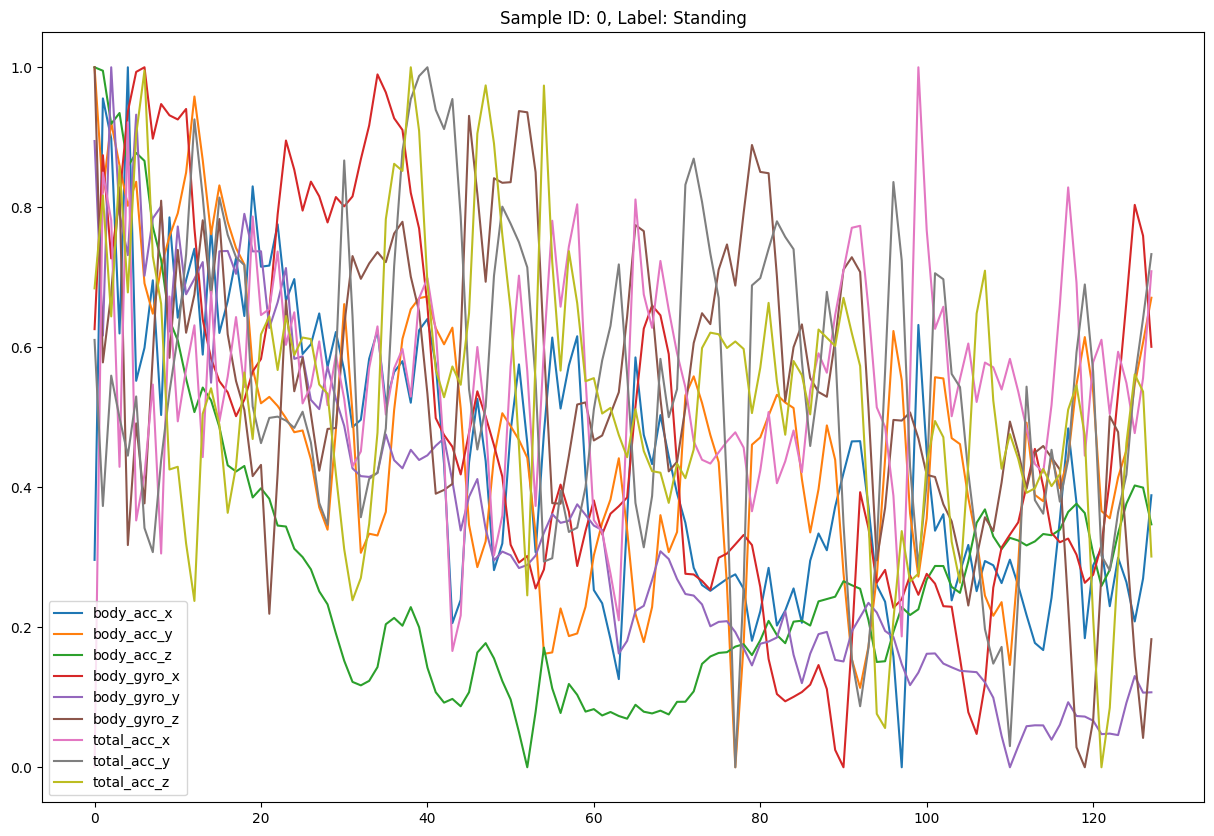

In [8]:
scaled_df = get_whole_dataset(train, y_train, minmax=True)
plot_data(0, scaled_df)

In [9]:
def denoise(df: pd.DataFrame, window_size: int = 5) -> pd.DataFrame:
    kernel = np.ones(window_size) / window_size

    def smooth(arr):
        arr = np.convolve(arr, kernel, mode='same')
        return arr[window_size//2 : -window_size//2]  # optional trimming

    return df.applymap(lambda arr: smooth(arr) if isinstance(arr, np.ndarray) else arr)

denoised_df = denoise(scaled_df, window_size=5)

C:\Users\tungq\AppData\Local\Temp\ipykernel_112612\2922392842.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda arr: smooth(arr) if isinstance(arr, np.ndarray) else arr)


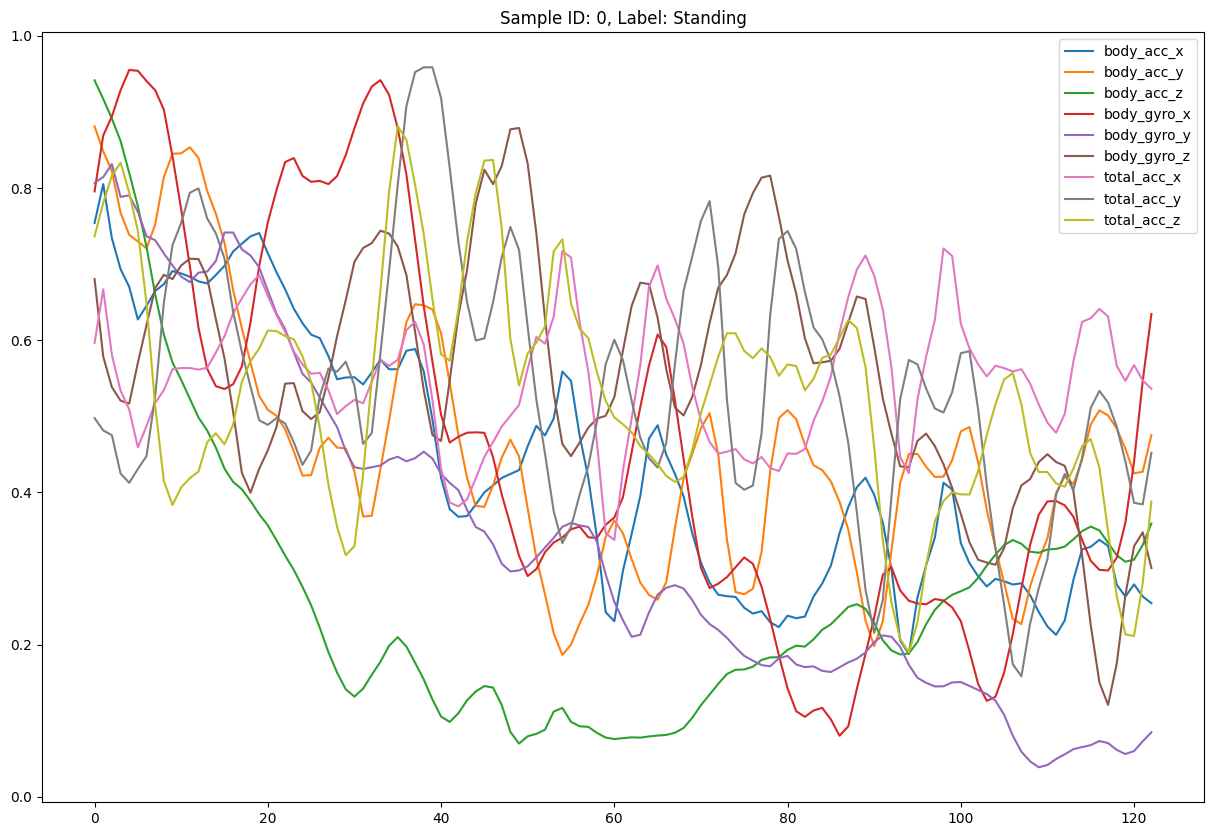

In [10]:
plot_data(0, denoised_df)

In [13]:
# Save data
denoised_df.to_csv('../structured_data/denoised_data.csv', index=False)
scaled_df.to_csv('../structured_data/scaled_data.csv', index=False)
total_df.to_csv('../structured_data/raw_data.csv', index=False)